🔍 Loading training dataset...
Found 5712 files belonging to 4 classes.
Using 4570 files for training.
Found 5712 files belonging to 4 classes.

🔍 Loading test dataset...
Found 1311 files belonging to 4 classes.
Using 1049 files for training.

📊 Dataset Summary:
- Training samples: 4576
- Validation samples: 5728
- Test samples: 1056

🖼️ Sample training images:


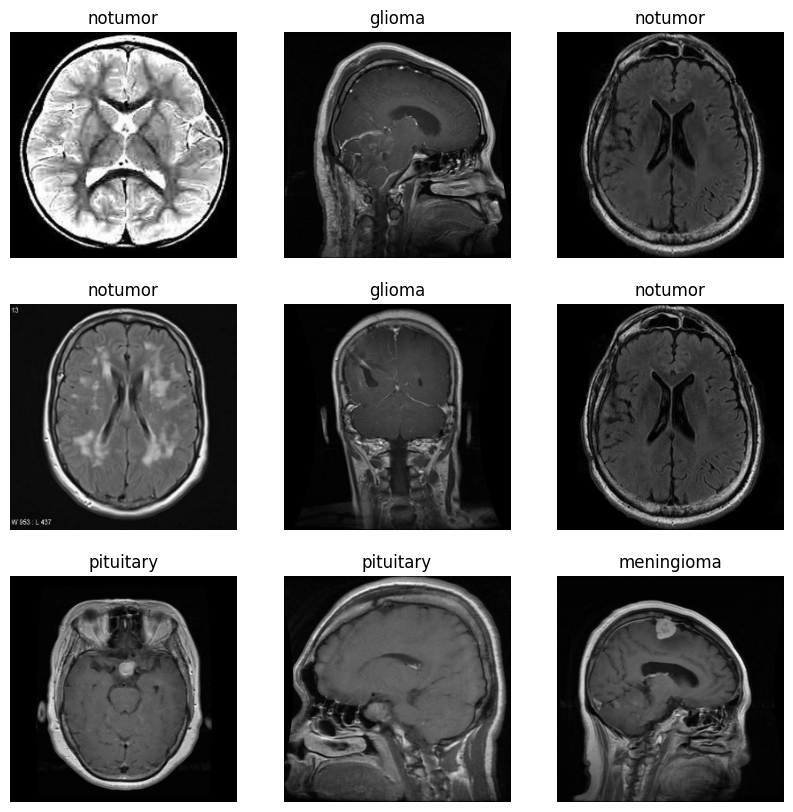


🧠 Building model...


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 256, 256, 1)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 256, 256, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 128, 128, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 131072)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      33,554,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,648,388 (128.36 MB)

 Trainable params: 33,648,388 (128.36 MB)

 Non-trainable params: 0 (0.00 B)


🚀 Starting training...
Epoch 1/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 33s 185ms/step - accuracy: 0.6197 - loss: 0.9637 - precision: 0.7087 - recall: 0.4598 - val_accuracy: 0.8606 - val_loss: 0.4120 - val_precision: 0.8802 - val_recall: 0.8300
Epoch 2/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - accuracy: 0.8426 - loss: 0.4305 - precision: 0.8619 - recall: 0.8143 - val_accuracy: 0.9172 - val_loss: 0.2347 - val_precision: 0.9249 - val_recall: 0.9098
Epoch 3/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.8935 - loss: 0.2844 - precision: 0.9036 - recall: 0.8823 - val_accuracy: 0.9294 - val_loss: 0.1941 - val_precision: 0.9325 - val_recall: 0.9261
Epoch 4/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.9274 - loss: 0.1831 - precision: 0.9311 - recall: 0.9228 - val_accuracy: 0.9485 - val_loss: 0.1462 - val_precision: 0.9491 - val_recall: 0.9466
Epoch 5/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.9441 - loss: 0.1537 - precision: 0.9481 - recall: 0.9414 - val_

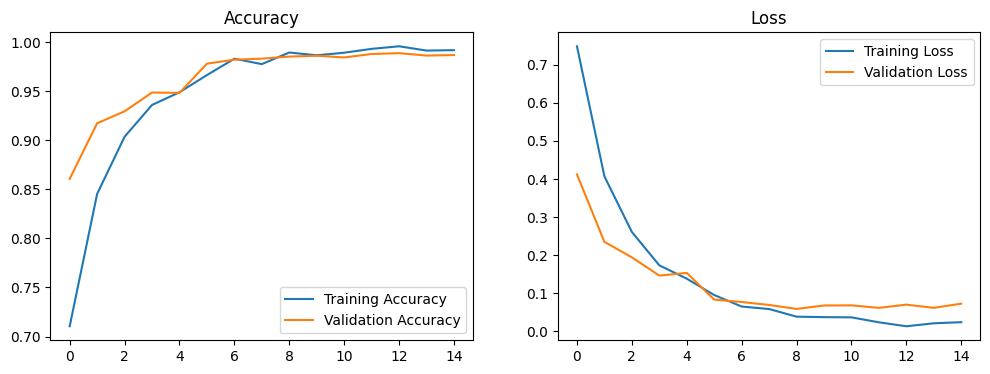

In [2]:
# ====================== CONFIG ======================
import os
import tensorflow as tf
from tqdm import tqdm
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Local dataset paths
DATA_DIR = "/kaggle/input/brain-tumor-mri-dataset"
TRAIN_DIR = os.path.join(DATA_DIR, "Training")
TEST_DIR = os.path.join(DATA_DIR, "Testing")

# Class names
CLASS_NAMES = ['glioma', 'meningioma', 'notumor', 'pituitary']
NUM_CLASSES = len(CLASS_NAMES)
IMG_SIZE = (256, 256)
BATCH_SIZE = 32
AUTOTUNE = tf.data.AUTOTUNE

# ====================== DATA LOADING ======================
def load_dataset(base_dir, subset="training"):
    """Load dataset using tf.keras.preprocessing.image_dataset_from_directory"""
    return tf.keras.preprocessing.image_dataset_from_directory(
        directory=base_dir,
        labels='inferred',
        label_mode='categorical',
        class_names=CLASS_NAMES,
        color_mode='grayscale',
        batch_size=BATCH_SIZE,
        image_size=IMG_SIZE,
        shuffle=True,
        seed=42,
        validation_split=0.2 if subset == "training" else None,
        subset=subset if subset == "training" else None
    )

# ====================== DATA PREPROCESSING ======================
def preprocess(image, label):
    """Normalize images and convert to float32"""
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

def configure_for_performance(ds):
    """Optimize dataset performance"""
    ds = ds.map(preprocess, num_parallel_calls=AUTOTUNE)
    ds = ds.cache()
    ds = ds.prefetch(buffer_size=AUTOTUNE)
    return ds

# ====================== MODEL ARCHITECTURE ======================
def build_model():
    inputs = tf.keras.Input(shape=IMG_SIZE + (1,))
    
    # Feature extraction
    x = tf.keras.layers.Conv2D(32, 3, activation='relu', padding='same')(inputs)
    x = tf.keras.layers.MaxPooling2D()(x)
    x = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same')(x)
    x = tf.keras.layers.MaxPooling2D()(x)
    x = tf.keras.layers.Conv2D(128, 3, activation='relu', padding='same')(x)
    x = tf.keras.layers.MaxPooling2D()(x)
    
    # Classification head
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(256, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.5)(x)
    outputs = tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')(x)
    
    model = tf.keras.Model(inputs, outputs)
    
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy', 
                tf.keras.metrics.Precision(name='precision'),
                tf.keras.metrics.Recall(name='recall')]
    )
    return model

# ====================== VISUALIZATION ======================
def plot_sample_images(dataset):
    plt.figure(figsize=(10, 10))
    for images, labels in dataset.take(1):
        for i in range(9):
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(images[i].numpy().astype("float32").squeeze(), cmap='gray')
            plt.title(CLASS_NAMES[tf.argmax(labels[i])])
            plt.axis("off")
    plt.show()

# ====================== MAIN ======================
def main():
    print("🔍 Loading training dataset...")
    train_ds = load_dataset(TRAIN_DIR, subset="training")
    val_ds = load_dataset(TRAIN_DIR, subset="validation")
    
    print("\n🔍 Loading test dataset...")
    test_ds = load_dataset(TEST_DIR)
    
    # Dataset information
    print("\n📊 Dataset Summary:")
    print(f"- Training samples: {len(train_ds)*BATCH_SIZE}")
    print(f"- Validation samples: {len(val_ds)*BATCH_SIZE}")
    print(f"- Test samples: {len(test_ds)*BATCH_SIZE}")
    
    # Visualize samples
    print("\n🖼️ Sample training images:")
    plot_sample_images(train_ds)
    
    # Configure datasets for performance
    train_ds = configure_for_performance(train_ds)
    val_ds = configure_for_performance(val_ds)
    test_ds = configure_for_performance(test_ds)
    
    # Build and train model
    print("\n🧠 Building model...")
    model = build_model()
    model.summary()
    
    print("\n🚀 Starting training...")
    history = model.fit(
        train_ds,
        validation_data=val_ds,
        epochs=15,
        verbose=1
    )
    
    # Evaluate on test set
    print("\n🧪 Evaluating on test set...")
    test_results = model.evaluate(test_ds)
    print(f"\nTest Accuracy: {test_results[1]:.4f}")
    print(f"Test Precision: {test_results[2]:.4f}")
    print(f"Test Recall: {test_results[3]:.4f}")
    
    # Plot training history
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    main()

GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Found 4571 images belonging to 4 classes.
Found 1141 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 224, 224, 1)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_15 (Conv2D)        │ (None, 224, 224, 32)   │            320 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_8     │ (None, 224, 224, 32)   │            128 │ conv2d_15[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_4           │ (None, 112, 112, 32)   │              0 │ batch_normalization_8… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_9 (Dropout)       │ (None, 112, 112, 32)   │              0 │ max_pooling2d_4[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_17 (Conv2D)        │ (None, 112, 112, 64)   │         18,496 │ dropout_9[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_9     │ (None, 112, 112, 64)   │            256 │ conv2d_17[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_18 (Conv2D)        │ (None, 56, 56, 64)     │         36,928 │ batch_normalization_9… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_16 (Conv2D)        │ (None, 56, 56, 64)     │          2,112 │ dropout_9[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_5 (Add)               │ (None, 56, 56, 64)     │              0 │ conv2d_18[0][0],       │
│                           │                        │                │ conv2d_16[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_10 (Dropout)      │ (None, 56, 56, 64)     │              0 │ add_5[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_20 (Conv2D)        │ (None, 56, 56, 128)    │         73,856 │ dropout_10[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_10    │ (None, 56, 56, 128)    │            512 │ conv2d_20[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_21 (Conv2D)        │ (None, 28, 28, 128)    │        147,584 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_19 (Conv2D)        │ (None, 28, 28, 128)    │          8,320 │ dropout_10[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_6 (Add)               │ (None, 28, 28, 128)    │              0 │ conv2d_21[0][0],       │
│                           │                        │                │ conv2d_19[0][0]        │
├──────────────────────

 Total params: 1,241,220 (4.73 MB)

 Trainable params: 1,240,260 (4.73 MB)

 Non-trainable params: 960 (3.75 KB)


Starting training...
Epoch 1/60


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


143/143 ━━━━━━━━━━━━━━━━━━━━ 60s 315ms/step - accuracy: 0.4999 - auc: 0.7660 - loss: 1.8868 - precision: 0.5672 - recall: 0.3638 - val_accuracy: 0.2550 - val_auc: 0.5250 - val_loss: 2.7763 - val_precision: 0.2550 - val_recall: 0.2550 - learning_rate: 2.0000e-04
Epoch 2/60
143/143 ━━━━━━━━━━━━━━━━━━━━ 32s 217ms/step - accuracy: 0.6339 - auc: 0.8697 - loss: 1.5141 - precision: 0.7009 - recall: 0.5497 - val_accuracy: 0.2550 - val_auc: 0.4622 - val_loss: 5.8790 - val_precision: 0.2550 - val_recall: 0.2550 - learning_rate: 4.0000e-04
Epoch 3/60
143/143 ━━━━━━━━━━━━━━━━━━━━ 32s 218ms/step - accuracy: 0.6856 - auc: 0.9015 - loss: 1.3067 - precision: 0.7356 - recall: 0.6120 - val_accuracy: 0.2550 - val_auc: 0.5105 - val_loss: 10.6777 - val_precision: 0.2553 - val_recall: 0.2550 - learning_rate: 6.0000e-04
Epoch 4/60
143/143 ━━━━━━━━━━━━━━━━━━━━ 32s 216ms/step - accuracy: 0.7063 - auc: 0.9059 - loss: 1.2857 - precision: 0.7592 - recall: 0.6387 - val_accuracy: 0.3909 - val_auc: 0.6158 - val_loss

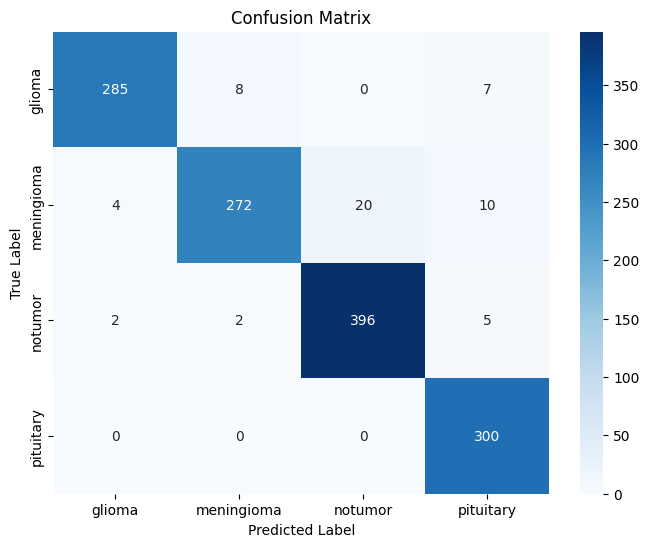


Classification Report:
              precision    recall  f1-score   support

      glioma       0.98      0.95      0.96       300
  meningioma       0.96      0.89      0.93       306
     notumor       0.95      0.98      0.96       405
   pituitary       0.93      1.00      0.96       300

    accuracy                           0.96      1311
   macro avg       0.96      0.95      0.95      1311
weighted avg       0.96      0.96      0.96      1311



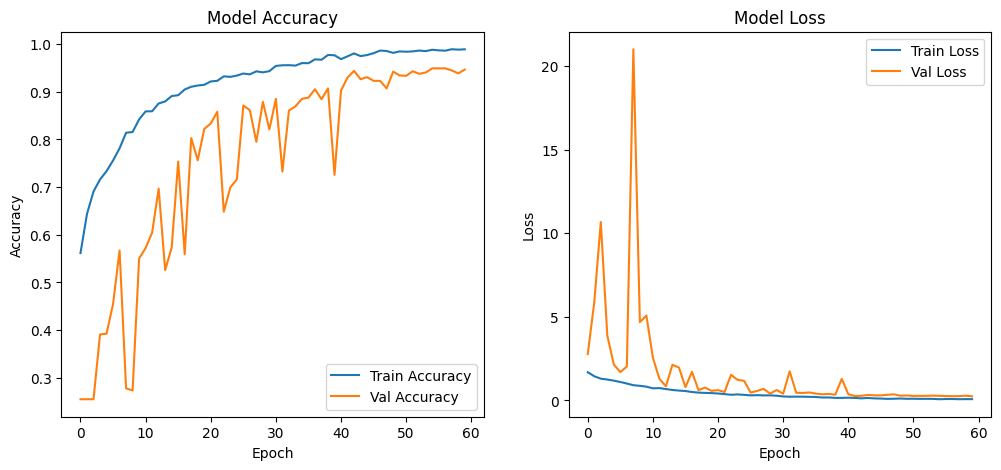

In [3]:
# ====================== COMPLETE BRAIN TUMOR CLASSIFICATION ======================
import tensorflow as tf
from tensorflow.keras import layers, regularizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, LearningRateScheduler
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# ====================== CONFIGURATION ======================
# Dataset parameters
DATA_DIR = "/kaggle/input/brain-tumor-mri-dataset"  # Kaggle dataset path
CLASS_NAMES = ['glioma', 'meningioma', 'notumor', 'pituitary']
NUM_CLASSES = len(CLASS_NAMES)

# Training parameters
IMG_SIZE = (224, 224)  # Optimal size for memory efficiency
BATCH_SIZE = 32
EPOCHS = 60
INIT_LR = 0.001
MIN_LR = 1e-6

# Class weights (adjust if class imbalance exists)
CLASS_WEIGHTS = {0: 1.3,  # glioma
                 1: 3.0,  # meningioma 
                 2: 1.0,  # notumor
                 3: 1.2}  # pituitary

# ====================== DATA PIPELINE ======================
def create_data_generators():
    # Training with augmentation
    train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rescale=1./255,
        validation_split=0.2,
        rotation_range=20,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
        brightness_range=[0.8, 1.2],
        fill_mode='nearest'
    )

    # Validation/test generator (no augmentation)
    test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

    # Training dataset
    train_ds = train_datagen.flow_from_directory(
        os.path.join(DATA_DIR, "Training"),
        target_size=IMG_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        subset='training',
        color_mode='grayscale',
        shuffle=True,
        classes=CLASS_NAMES
    )

    # Validation dataset
    val_ds = train_datagen.flow_from_directory(
        os.path.join(DATA_DIR, "Training"),
        target_size=IMG_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        subset='validation',
        color_mode='grayscale',
        shuffle=True,
        classes=CLASS_NAMES
    )

    # Test dataset
    test_ds = test_datagen.flow_from_directory(
        os.path.join(DATA_DIR, "Testing"),
        target_size=IMG_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        color_mode='grayscale',
        shuffle=False,
        classes=CLASS_NAMES
    )

    return train_ds, val_ds, test_ds

# ====================== MODEL ARCHITECTURE ======================
def build_model():
    inputs = tf.keras.Input(shape=IMG_SIZE + (1,))
    
    # Initial convolution block
    x = layers.Conv2D(32, 3, activation='relu', padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D()(x)
    x = layers.Dropout(0.2)(x)

    # Residual blocks
    filters = [64, 128, 256]
    for f in filters:
        # Skip connection
        residual = layers.Conv2D(f, 1, strides=2, padding='same')(x)
        
        # Main path
        x = layers.Conv2D(f, 3, activation='relu', padding='same')(x)
        x = layers.BatchNormalization()(x)
        x = layers.Conv2D(f, 3, strides=2, activation='relu', padding='same')(x)
        x = layers.add([x, residual])
        x = layers.Dropout(0.3)(x)

    # Classification head
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(NUM_CLASSES, activation='softmax')(x)

    model = tf.keras.Model(inputs, outputs)
    
    # Learning rate schedule
    def lr_schedule(epoch, lr):
        if epoch < 5:  # Warmup
            return INIT_LR * (epoch + 1) / 5
        progress = (epoch - 5) / (EPOCHS - 5)
        return max(MIN_LR, INIT_LR * 0.5 * (1 + np.cos(np.pi * progress)))

    # Compile model
    optimizer = tf.keras.optimizers.Adam(learning_rate=INIT_LR)
    model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=['accuracy',
                tf.keras.metrics.Precision(name='precision'),
                tf.keras.metrics.Recall(name='recall'),
                tf.keras.metrics.AUC(name='auc')]
    )
    
    return model, lr_schedule

# ====================== TRAINING ======================
def train_and_evaluate():
    # Verify GPU
    print("GPU Available:", tf.config.list_physical_devices('GPU'))
    
    # Create datasets
    train_ds, val_ds, test_ds = create_data_generators()
    
    # Build model
    model, lr_schedule = build_model()
    model.summary()
    
    # Callbacks
    callbacks = [
        EarlyStopping(monitor='val_auc', patience=10, restore_best_weights=True, mode='max'),
        ReduceLROnPlateau(monitor='val_auc', factor=0.5, patience=5, min_lr=MIN_LR, mode='max'),
        ModelCheckpoint('best_model.h5', monitor='val_auc', save_best_only=True, mode='max'),
        LearningRateScheduler(lr_schedule)
    ]
    
    # Train model
    print("\nStarting training...")
    history = model.fit(
        train_ds,
        validation_data=val_ds,
        epochs=EPOCHS,
        callbacks=callbacks,
        class_weight=CLASS_WEIGHTS,
        verbose=1
    )
    
    # Load best model
    model = tf.keras.models.load_model('best_model.h5')
    
    # Evaluate
    print("\nEvaluating on test set...")
    results = model.evaluate(test_ds)
    print(f"\nTest Accuracy: {results[1]:.4f}")
    print(f"Test Precision: {results[2]:.4f}")
    print(f"Test Recall: {results[3]:.4f}")
    print(f"Test AUC: {results[4]:.4f}")
    
    # Generate predictions
    y_pred = model.predict(test_ds)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = test_ds.classes
    
    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred_classes)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=CLASS_NAMES, yticklabels=CLASS_NAMES)
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
    
    # Classification report
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred_classes, target_names=CLASS_NAMES))
    
    # Plot training history
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()

# ====================== MAIN EXECUTION ======================
if __name__ == "__main__":
    # Verify dataset exists
    if not os.path.exists(DATA_DIR):
        raise FileNotFoundError(f"Dataset directory not found at {DATA_DIR}. Please check the path.")
    
    train_and_evaluate()